## Pycrash - Single Degree of Freedom Model
### Demonstration using load cell barrier data

In [1]:
# commands for Jupyter Notebook
# %% allow reloading of modules
%load_ext autoreload
%autoreload 2

#### Import modules necessary for analyses

In [2]:
import sys
import pandas as pd
pd.options.display.max_columns = None
import plotly.io as pio
pio.renderers.default = "browser"  # <- determines how plots are displayed using Plotly

In [6]:
# current directory should be the project directory
import os
os.getcwd()

'D:\\OneDrive\\pycrash\\projects\\validation sdof'

#### Import Pycrash modules

In [4]:
sys.path.insert(0,'D:\\OneDrive\\pycrash')
import pycrash
from pycrash.sdof_model import SDOF_Model
from pycrash.project import Project, project_info, load_project
from pycrash.vehicle import Vehicle
from pycrash.visualization.sdof_plot import plot_velocity, plot_acceleration, plot_fdx, plot_vehicle_fdx

## Load project data
- datafile would have been created when project was initialized using the create_project script

In [5]:
project_info('Majid')

This saved project contains:


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive\\pycrash\\projects\\Majid\\data\\archive\\Majid.pkl'

In [ ]:
project_inputs = {'name':'Practice', 'pdesc':'single motion', 'sim_type':'SV', 'impact_type':'none',
                  'note':'single vehicle motion demo'}
proj = Project(project_inputs)

### Generate dataframe with driver inputs for vehicle 1 (striking vehicle)
- note - think of a dataframe as a basic excel sheet (header row and data columns)
- the time duration "end_time" is critical becuase it determines length of simulation

In [4]:
end_time = 5  # 5 second simulation
t = list(np.arange(0, end_time+0.1, 0.1))  # create time array from 0 to end time from user
throttle = [0] * len(t)                                # no throttle
brake = [0] * len(t)                                   # no braking
steer = [0] * len(t)                                   # no steering
driver_input_dict = {'t':t, 'throttle':throttle, 'brake':brake, 'steer':steer}
driver_input_df = pd.DataFrame.from_dict(driver_input_dict)
print('Vehicle 1 Driver Inputs:')
driver_input_df.head() # first 5 rows of driver input data

Vehicle 1 Driver Inputs:


,t,throttle,brake,steer
0,0.0,0,0,0
1,0.1,0,0,0
2,0.2,0,0,0
3,0.3,0,0,0
4,0.4,0,0,0


### Create Vehicle 1:
- "Vehicle" stores information about a single vehicle - all possible inputs do not need to be entered
- creating a Vehicle requries a "name" which is used to identify the vehicle in outputs / plots etc. 

In [5]:
vehicle_input_dict = {"year":2016,
"make":"Subaru",
"model":"WRX Sti",
"weight":3200,
"vin":"123abc",
"brake":0,
"steer_ratio":16.5,
"init_x_pos":20,
"init_y_pos":50,
"head_angle":0,
"v_width":6,
"v_length":19.3,
"hcg":2,
"lcgf":4.88,
"lcgr":6.96,
"wb":11.84,
"track":6.6,
"f_hang":3.2,
"r_hang":4.1,
"tire_d":2.716666667,
"tire_w":0.866666667,
"izz":2500,
"fwd":0,
"rwd":1,
"awd":0,
"A":100,
"B":41,
"k":1000,
"L":0,
"c":0,
"vx_initial":10,
"vy_initial":0,
"omega_z":0,
"driver_input":driver_input_df}

veh1 = Vehicle('Veh1', vehicle_input_dict)

### Assign impact point for Vehicle 1
- user will be prompted for a choice using a helper graphic

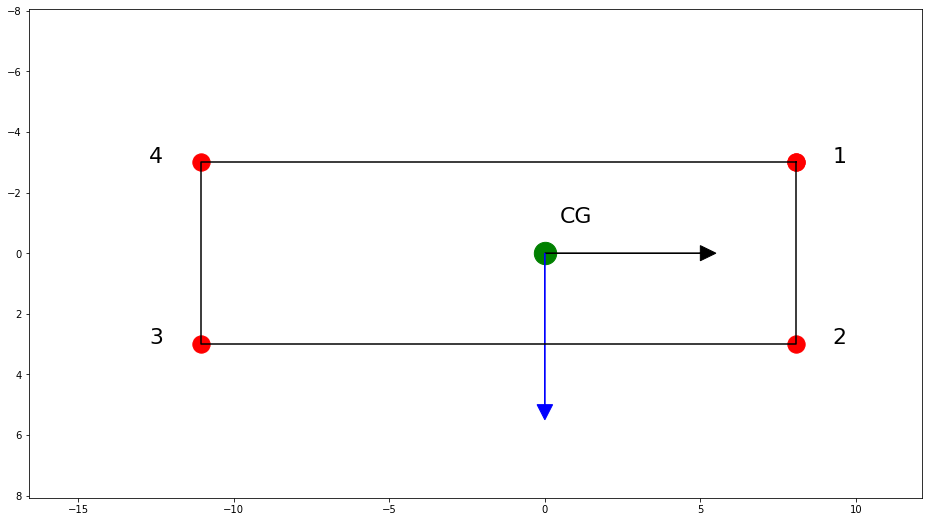

Choose option for impact point (1, 2, 3, 4, custom = 992


In [6]:
veh1.impact_point()

### Create Vehicle 2
- vehicle data can also be created by importing a CSV file in the data/input directory
- `TODO`: change this directory to the "Project" directory - seperate input folder etc.

In [21]:
os.chdir('/home/joemcormier/github/pycrash')

In [7]:
veh2 = Vehicle('Veh2')
veh2.load_specs('fordGT.csv')

Model year = 2016
Vehicle make = Ford
Vehicle model = GT
Vehicle weight (lb) = 3000
Vehicle Identification Number (VIN) = 123abc
Percent Braking = 0
Steering ratio = 16.5
Initial X position (ft) = 40
Initial Y position (ft) = 50
Heading angle (deg) = -90
Vehicle width (ft) = 6
Vehicle length (ft) = 19.3
CG height (ft) = 2
CG to front axle (ft) = 4.88
CG to rear axle (ft) = 6.96
Wheelbase (ft) = 11.84
Track width (ft) = 6.6
Front overhang (ft) = 3.2
Rear overhang (ft) = 4.1
Tire diameter (ft) = 2.716666667
Tire width (ft) = 0.866666667
Izz (slug - ft^2) = 2500
Front wheel drive (0/1) = 0
Rear wheel drive (0/1) = 1
All wheel drive (0/1) = 0
A = 100
B = 41
k = 1000
Damage length L (in) = 0
Crush depth c (in) = 0
Initial forward velocity Vx (mph) = 1
Initial lateral velocity Vy (mph) = 0
Initial Yaw Rate (deg/s) = 0


### driver input can be added at anytime

In [8]:
end_time = 5  # 5 second simulation
t = list(np.arange(0, end_time+0.1, 0.1))  # create time array from 0 to end time from user
throttle = [0] * len(t)                                # no throttle
brake = [0] * len(t)                                   # no braking
steer = [0] * len(t)                                   # no steering
driver_input_dict = {'t':t, 'throttle':throttle, 'brake':brake, 'steer':steer}
driver_input_df = pd.DataFrame.from_dict(driver_input_dict)
print('Vehicle 2 Driver Inputs:')

veh2.driver_input = driver_input_df
veh2.driver_input.head() # first 5 rows of driver input data

Vehicle 2 Driver Inputs:


,t,throttle,brake,steer
0,0.0,0,0,0
1,0.1,0,0,0
2,0.2,0,0,0
3,0.3,0,0,0
4,0.4,0,0,0


### Assing impact edge for Vehicle 2
- user will be prompted for a choice

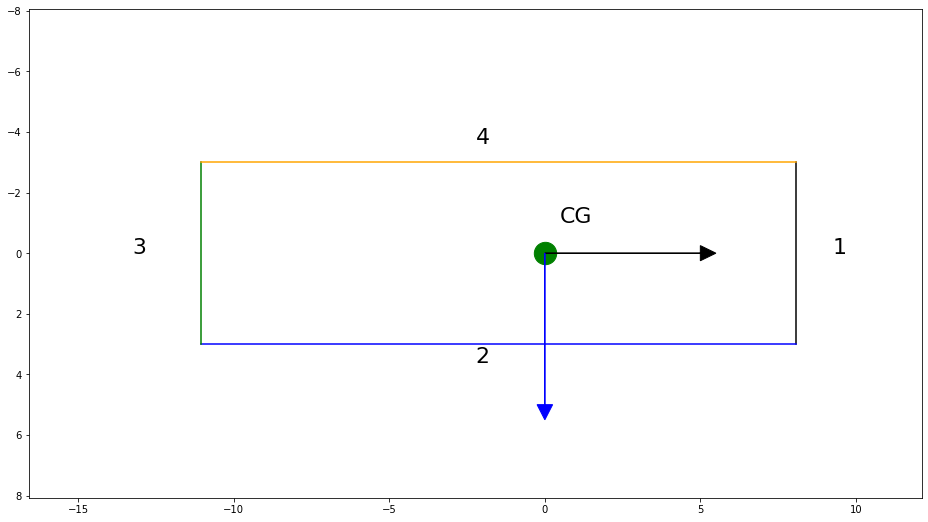

Choose option for impact edge4


In [9]:
veh2.impact_edge()

### Saving a project with all associated objects

In [ ]:
proj.save_project(veh1, veh2)

### Generate an instance of multi vehicle model
this function takes a list of vehicles - always set in order of [striking, struck]  
#### requires two inputs:  
1. name - used in saving and retrieving data
2. vehicle_list = [vehicle1, vehicle2]  
3. impact_type = {'ss' (sideswipe), 'impc' (impulse momentum)}  
optional - ignore_driver = False (default) - simulation will ignore driver inputs after impact and use entry at impact


In [10]:
ss1 = KinematicsTwo('intersection', veh1, veh2)

Driver input for Veh1 of shape = (51, 4)
Driver input for Veh2 of shape = (51, 4)


### set-up vehicle initial location
- use any prior simulation motion data to show paths

plotting vehicle Veh1
plotting vehicle Veh1


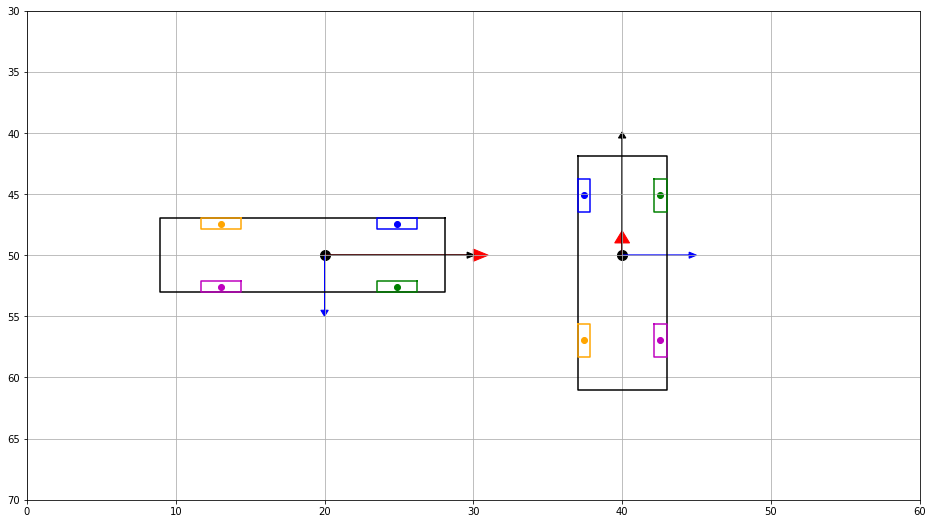

In [64]:
ss1.initial_position()

### Run simulation

In [56]:
print(f'Impacting Edge: {ss1.veh2.edgeimpact}')
print(f'Impacting Edge X Points: {ss1.veh2.edgeimpact_x1}, {ss1.veh2.edgeimpact_x2}')
print(f'Impacting Edge Y Points: {ss1.veh2.edgeimpact_y1}, {ss1.veh2.edgeimpact_y2}')

Impacting Edge: 4
Impacting Edge X Points: -11.059999999999999, 8.08
Impacting Edge Y Points: -3.0, -3.0


In [65]:
ss1.simulate(impact_type = 'ss', ignore_driver = False)

Two vehicle simulation will run for 5.0 s
-- looking for impact --
Vehicle 1 time = 0.1
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -3.146667000000001, y = -10.453330000000001
Impact Point location: x = 29.54667, y = 53.0
Veh1 CG location: x = 21.46667, y = 50.0
Veh2 CG location: x = 40.0, y = 49.853333
{'impact': False, 'crushdx': 0, 'crushdy': 7.453330000000001, 'mutual_crush': 0}
-- looking for impact --
Vehicle 1 time = 0.2
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -3.293334000000002, y = -8.98666
Impact Point location: x = 31.01334, y = 53.0
Veh1 CG location: x = 22.93334, y = 50.0
Veh2 CG location: x = 40.0, y = 49.706666
{'impact': False, 'crushdx': 0, 'crushdy': 5.9866600000000005, 'mutual_crush': 0}
-- looking for impact --
Vehicle 1 time = 0.3
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -3.4400010000000028, y = -7.51999
Impact Point location: x = 32.48001, y = 53.0
Veh1 CG location: x = 24.4000

/home/joemcormier/github/pycrash/src/multi_vehicle_model.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh.veh_model.t[i] = round(i * dt_motion, 4) # assigning time
/home/joemcormier/github/pycrash/src/multi_vehicle_model.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  -1 * veh.veh_model.rr_fx[i-1] * veh.track / 2, -1 * veh.veh_model.rr_fy[i-1] * veh.lcgr, veh.veh_model.lr_fx[i-1] * veh.track / 2 , -1 * veh.veh_model.lr_fy[i-1] * veh.lcgr])])
/home/joemcormier/github/pycrash/src/multi_vehicle_model.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c


Vehicle 1 time = 0.9
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -4.320003, y = 1.2800299999999967
Impact Point location: x = 41.28003, y = 53.0
Veh1 CG location: x = 33.20003, y = 50.0
Veh2 CG location: x = 40.0, y = 48.679997
{'impact': True, 'crushdx': -4.320003, 'crushdy': -4.2800299999999964, 'mutual_crush': -4.2800299999999964}
Impact dectected at t = 0.9 seconds
Sideswipe Model Accessed at t = 0.9 seconds
-- looking for impact --
Vehicle 1 time = 1.0
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -4.466670000000001, y = 2.7466999999999904
Impact Point location: x = 42.74669999999999, y = 53.0
Veh1 CG location: x = 34.66669999999999, y = 50.0
Veh2 CG location: x = 40.0, y = 48.53333
{'impact': True, 'crushdx': -4.466670000000001, 'crushdy': -5.74669999999999, 'mutual_crush': -5.74669999999999}
Impact dectected at t = 1.0 seconds
Sideswipe Model Accessed at t = 1.0 seconds
-- looking for impact --
Vehicle 1 time = 1.1
Vehicle 2 H

-- looking for impact --
Vehicle 1 time = 2.8
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -7.106675999999998, y = 29.146759999999986
Impact Point location: x = 69.14675999999999, y = 53.0
Veh1 CG location: x = 61.06675999999998, y = 50.0
Veh2 CG location: x = 40.0, y = 45.893324
{'impact': True, 'crushdx': -7.106675999999998, 'crushdy': -32.146759999999986, 'mutual_crush': -32.146759999999986}
Impact dectected at t = 2.8 seconds
Sideswipe Model Accessed at t = 2.8 seconds
-- looking for impact --
Vehicle 1 time = 2.9
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -7.253342999999999, y = 30.61342999999998
Impact Point location: x = 70.61342999999998, y = 53.0
Veh1 CG location: x = 62.53342999999998, y = 50.0
Veh2 CG location: x = 40.0, y = 45.746657
{'impact': True, 'crushdx': -7.253342999999999, 'crushdy': -33.61342999999998, 'mutual_crush': -33.61342999999998}
Impact dectected at t = 2.9 seconds
Sideswipe Model Accessed at t = 2.9 sec

-- looking for impact --
Vehicle 1 time = 4.8
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -10.040015999999998, y = 58.480159999999955
Impact Point location: x = 98.48015999999996, y = 53.0
Veh1 CG location: x = 90.40015999999996, y = 50.0
Veh2 CG location: x = 40.0, y = 42.959984
{'impact': True, 'crushdx': -10.040015999999998, 'crushdy': -61.480159999999955, 'mutual_crush': -61.480159999999955}
Impact dectected at t = 4.8 seconds
Sideswipe Model Accessed at t = 4.8 seconds
-- looking for impact --
Vehicle 1 time = 4.9
Vehicle 2 Heading Angle = -90.0 degrees
Impact Point in Veh2 Frame x = -10.186682999999999, y = 59.94682999999996
Impact Point location: x = 99.94682999999996, y = 53.0
Veh1 CG location: x = 91.86682999999996, y = 50.0
Veh2 CG location: x = 40.0, y = 42.813317
{'impact': True, 'crushdx': -10.186682999999999, 'crushdy': -62.94682999999996, 'mutual_crush': -62.94682999999996}
Impact dectected at t = 4.9 seconds
Sideswipe Model Accessed at t = 4.9

In [70]:
ss1.veh1.veh_model.head()

,t,vx,vy,Vx,Vy,Vr,oz_deg,oz_rad,delta_deg,delta_rad,turn_rX,turn_rY,turn_rR,au,av,ax,ay,Ax,Ay,Ar,alphaz,alphaz_deg,beta_deg,beta_rad,lf_fx,lf_fy,rf_fx,rf_fy,rr_fx,rr_fy,lr_fx,lr_fy,lf_alpha,rf_alpha,rr_alpha,lr_alpha,lf_lock,rf_lock,rr_lock,lr_lock,lf_fz,rf_fz,rr_fz,lr_fz,theta_rad,theta_deg,Fx,Fy,Mz,Dx,Dy
0,0.0,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,0,0,0,20.00000,50.0
1,0.1,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,0,0,0,21.46667,50.0
2,0.2,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,0,0,0,22.93334,50.0
3,0.3,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,0,0,0,24.40001,50.0
4,0.4,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,0,0,0,25.86668,50.0


In [69]:
ss1.veh2.veh_model.head()

,t,vx,vy,Vx,Vy,Vr,oz_deg,oz_rad,delta_deg,delta_rad,turn_rX,turn_rY,turn_rR,au,av,ax,ay,Ax,Ay,Ar,alphaz,alphaz_deg,beta_deg,beta_rad,lf_fx,lf_fy,rf_fx,rf_fy,rr_fx,rr_fy,lr_fx,lr_fy,lf_alpha,rf_alpha,rr_alpha,lr_alpha,lf_lock,rf_lock,rr_lock,lr_lock,lf_fz,rf_fz,rr_fz,lr_fz,theta_rad,theta_deg,Fx,Fy,Mz,Dx,Dy
0,0.0,1.46667,0.0,8.980764e-17,-1.46667,1.46667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.0,-1.570796,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,881.756757,881.756757,618.243243,618.243243,-1.570796,-90.0,0,0,0,40.0,50.000000
1,0.1,1.46667,0.0,8.980764e-17,-1.46667,1.46667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.0,-1.570796,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,881.756757,881.756757,618.243243,618.243243,-1.570796,-90.0,0,0,0,40.0,49.853333
2,0.2,1.46667,0.0,8.980764e-17,-1.46667,1.46667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.0,-1.570796,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,881.756757,881.756757,618.243243,618.243243,-1.570796,-90.0,0,0,0,40.0,49.706666
3,0.3,1.46667,0.0,8.980764e-17,-1.46667,1.46667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.0,-1.570796,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,881.756757,881.756757,618.243243,618.243243,-1.570796,-90.0,0,0,0,40.0,49.559999
4,0.4,1.46667,0.0,8.980764e-17,-1.46667,1.46667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.0,-1.570796,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,881.756757,881.756757,618.243243,618.243243,-1.570796,-90.0,0,0,0,40.0,49.413332


### Plot Vehicle Motion

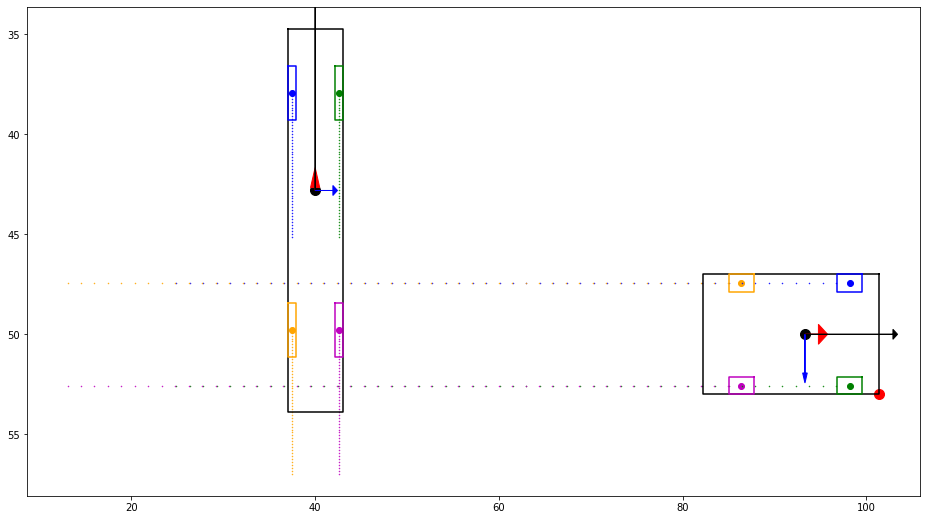

In [70]:
ss1.draw_simulation(len(ss1.veh1.veh_model.t)-1)

In [49]:
ss1.veh1.veh_model.head()

,t,vx,vy,Vx,Vy,Vr,oz_deg,oz_rad,delta_deg,delta_rad,turn_rX,turn_rY,turn_rR,au,av,ax,ay,Ax,Ay,Ar,alphaz,alphaz_deg,beta_deg,beta_rad,lf_fx,lf_fy,rf_fx,rf_fy,rr_fx,rr_fy,lr_fx,lr_fy,lf_alpha,rf_alpha,rr_alpha,lr_alpha,lf_lock,rf_lock,rr_lock,lr_lock,lf_fz,rf_fz,rr_fz,lr_fz,theta_rad,theta_deg,Fx,Fy,Mz,Dx,Dy
0,0.0,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,NaN,NaN,NaN,20.00000,50.0
1,0.1,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,NaN,NaN,NaN,21.46667,50.0
2,0.2,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,NaN,NaN,NaN,22.93334,50.0
3,0.3,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,NaN,NaN,NaN,24.40001,50.0
4,0.4,14.6667,0.0,14.6667,0.0,14.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,940.540541,940.540541,659.459459,659.459459,0.0,0.0,NaN,NaN,NaN,25.86668,50.0


In [52]:
max(ss1.veh1.veh_model.Fx)

nan

In [50]:
ss1.veh2.edgeimpact

4

In [30]:
xy_ratio

1.7777777777777777